In [1]:
import pandas as pd
import seaborn as sns
import imdb

In [2]:
fetcher = imdb.IMDb()

In [3]:
top250 = pd.read_csv("./custom_csv_files/top250.csv")

In [4]:
top250 = top250.drop(['Unnamed: 0'], axis = 1)

In [5]:
num_per_year = top250.groupby(['Year']).count()['ID']

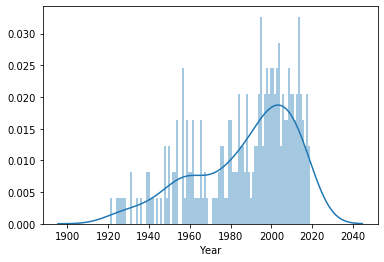

In [6]:
plot = sns.distplot(top250['Year'], bins = 100)

In [7]:
top250.head()

,ID,Title,Year,Star1,Star2,Star3,Star4,Star5
0,111161,The Shawshank Redemption,1994,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Clancy Brown
1,68646,The Godfather,1972,Marlon Brando,Al Pacino,James Caan,Richard S. Castellano,Robert Duvall
2,71562,The Godfather: Part II,1974,Al Pacino,Robert Duvall,Diane Keaton,Robert De Niro,John Cazale
3,468569,The Dark Knight,2008,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Maggie Gyllenhaal
4,50083,12 Angry Men,1957,Martin Balsam,John Fiedler,Lee J. Cobb,E.G. Marshall,Jack Klugman


In [8]:
best_actors = top250['Star2'].append(top250['Star1'], ignore_index = True).append(top250['Star3'], ignore_index = True).append(top250['Star4'], ignore_index = True).value_counts()

In [18]:
best_actors

Robert De Niro        7
Tom Hanks             7
Aamir Khan            6
Leonardo DiCaprio     6
Harrison Ford         6
Clint Eastwood        5
Charles Chaplin       4
Morgan Freeman        4
Brad Pitt             4
Christian Bale        4
Mark Ruffalo          4
James Stewart         4
Jack Nicholson        4
Tom Hardy             4
Al Pacino             4
Gunnar Björnstrand    3
Tim Roth              3
Tim Allen             3
William Holden        3
Paul Newman           3
Ralph Fiennes         3
Ethan Hawke           3
Michael Caine         3
Robert Duvall         3
Mark Hamill           3
Toshirô Mifune        3
Russell Crowe         3
Tatsuya Nakadai       3
Marlon Brando         3
Jack Hawkins          3
                     ..
Çetin Tekindor        1
Machiko Kyô           1
Linda Cardellini      1
Diahnne Abbott        1
Leo Gullotta          1
Enzo Cannavale        1
Rosamund Pike         1
Nils Poppe            1
Alida Valli           1
Jared Leto            1
Mitsuo Iwata    

In [11]:
best_actors_df = pd.DataFrame(best_actors[best_actors > 1])


In [14]:
best_actors_df = best_actors_df.reset_index()


In [19]:
first_names = best_actors_df["index"].str.extract(r"([^\s]+)")

In [27]:
first_names.columns = ["Name"]
best_actors_df.columns = ["Names","Titles"]

In [31]:
first_names["Titles"] = best_actors_df["Titles"]

In [46]:
most_sucessful_names = first_names.groupby(["Name"]).sum().reset_index().sort_values(by = ["Titles"], ascending = False)

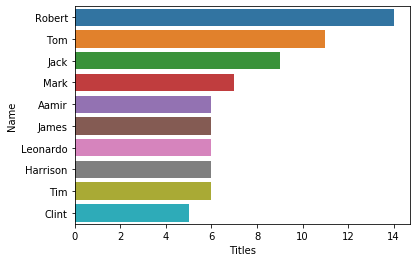

In [54]:
sns.barplot(y=most_sucessful_names["Name"][0:10], x=most_sucessful_names["Titles"][0:10])